**Autoenoders**
An autoencoder is a type of artificial neural network used for unsupervised learning. Its primary goal is to learn a compressed representation of input data, and it does this by encoding the data into a lower-dimensional latent space and then decoding it back to its original form. The entire process is meant to capture the most salient features of the data.

**The autoencoder structure**:
   - **Encoder**: This part of the network compresses the input into a latent-space representation. It encodes the input data as an internal fixed-size representation in reduced dimensionality.
   - **Latent Space**: This is the compressed representation of the input data. It holds the key features necessary to reconstruct the input data.
   - **Decoder**: This part of the network reconstructs the input data from the internal representation. It maps the encoded data back to the original space.


11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/10
235/235 [==============================] - 8s 6ms/step - loss: 0.2138 - val_loss: 0.1339
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1166 - val_loss: 0.1016
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0956 - val_loss: 0.0883
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0855 - val_loss: 0.0812
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0796 - val_loss: 0.0770
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0760 - val_loss: 0.0741
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0737 - val_loss: 0.0722
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0720 - val_loss: 0.0709
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0709 - val_loss: 0.0700
Epoch 10/10
313/313 [==============

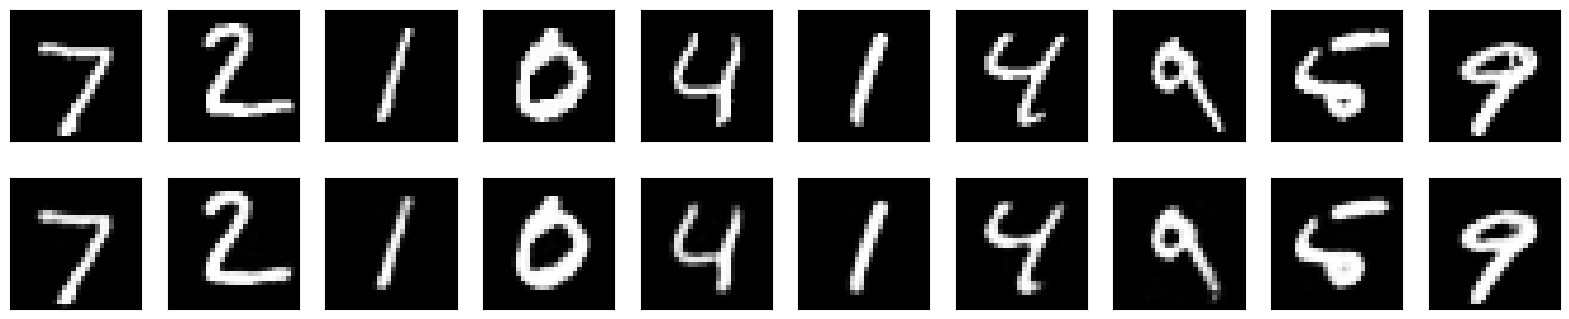

In [ ]:
# Necessary Imports
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Data Preprocessing
## Normalize the pixel values to [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
## Flatten the 28x28 images to a 784 vector for each image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Autoencoder Architecture
## Input layer
input_img = Input(shape=x_train.shape[1:])
## Encoding layer
encoded = Dense(128, activation='relu')(input_img)
## Decoding layer
decoded = Dense(np.prod(x_train.shape[1:]), activation='sigmoid')(encoded)

# Construct the Autoencoder Model
autoencoder = Model(input_img, decoded)

# Compile the model with MSE loss and adam optimizer
autoencoder.compile(optimizer='adam', loss='mse')

# Train the Autoencoder
## We're using the training images both as input and target since autoencoders are unsupervised
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Using the trained Autoencoder to reconstruct test images
encoded_imgs = autoencoder.predict(x_test)

# Visualization
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Variational Autoencoder**
Variational Autoencoders (VAEs) are a type of autoencoder that introduces probabilistic reasoning and optimization techniques from variational inference to create a generative model. While standard autoencoders are trained to minimize the reconstruction error between the input data and their output, VAEs aim to generate new samples that could have been produced by the input data.

**The variational autoencoder structure:**

- **Encoder**: Like traditional autoencoders, VAEs have an encoder that maps the input data to a latent space. However, instead of encoding the input as a single fixed point in the latent space, the VAE encoder outputs parameters of a probability distribution (usually Gaussian) over the latent space.
- **Sampling**: A sample is drawn from this distribution to provide a randomized latent space representation of the input. This introduces a stochastic element that aids in generating diverse outputs.
- **Decoder**: The sampled latent point is then passed through the decoder to generate a reconstruction of the input

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 184.0744 - val_loss: 149.6197
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 145.2498 - val_loss: 141.2954
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 139.6695 - val_loss: 137.4170
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 136.7644 - val_loss: 135.2663
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 134.9601 - val_loss: 133.6123
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 133.5678 - val_loss: 132.5351
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 132.4903 - val_loss: 131.6792
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 131.5912 - val_loss: 130.7870
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 130.7459 - val_loss: 129.9970
Epoch 10/10
313/313 [==============================] - 1s 2ms/st

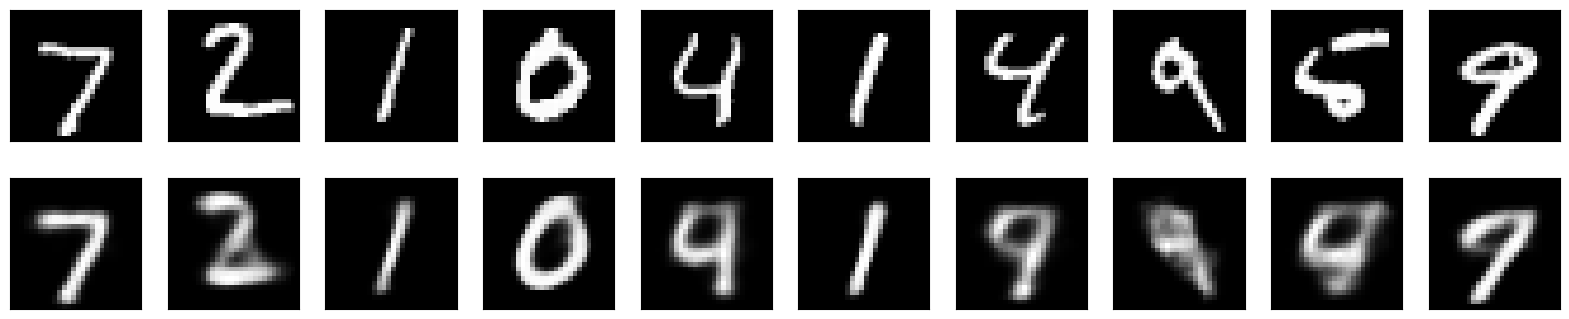

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras import backend as K

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten the input images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the input shape
input_shape = x_train.shape[1:]

# Define the dimensions of the latent space
latent_dim = 5

# Define the encoder architecture
input_img = Input(shape=input_shape)
encoded = Dense(256, activation='relu')(input_img)
z_mean = Dense(latent_dim)(encoded)
z_log_var = Dense(latent_dim)(encoded)

# Define the sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.0, stddev=1.0)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Perform the sampling to get the latent space
z = Lambda(sampling)([z_mean, z_log_var])

# Define the decoder architecture
decoded = Dense(256, activation='relu')(z)
output_img = Dense(np.prod(input_shape), activation='sigmoid')(decoded)

# Create the variational autoencoder model
vae = Model(input_img, output_img)

# Define the custom loss function
def vae_loss(input_img, output_img):
    reconstruction_loss = tf.keras.losses.binary_crossentropy(input_img, output_img) * np.prod(input_shape)
    kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return reconstruction_loss + kl_loss

# Compile the variational autoencoder model
vae.add_loss(vae_loss(input_img, output_img))
vae.compile(optimizer='adam')

# Train the variational autoencoder
vae.fit(x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, None))

# Use the trained variational autoencoder for encoding and decoding
encoded_imgs = vae.predict(x_test)

# Display some original and reconstructed images
import matplotlib.pyplot as plt

n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
